<a href="https://colab.research.google.com/github/czambrano26/MAT-421/blob/main/ModuleD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section 1.1 - Introduction

---
Linear algebra is a field of mathematics that plays an important role in data science and machine learning. In this chapter, we'll explore concepts that include vector spaces, orthogonality, eigenvalues, matrix decomposition. We will also expand on linear regression and principal component analysis. 

Section 1.2 - Elements of Linear Algebra

---
Linear Subspace - A linear subspace of V is a subset U⊆V that is closed under vector addition and scalar multiplication. This means that for all u1,u2∈U and a∈R, it holds that u1+u2∈U and au1∈U. 

Span - Let w1, ..., wm∈V. The span of {w1, ...,wm}, denoted span(w1, ...,wm) is the set of all linear combinations of the wj's. 

Every Span is a Linear Subspace - Let W=span(w1, ...,wm). Then W is a linear subspace. 

Column Space - Let A∈R^(n*m) be an n*m matrix with columns a1, ..., am∈R^n. The column space of A, denoted by col(A), is the span of the columns of A.

Linear Independence - A list of vectors u1, ..., um is linearly independent if noe of them can be written as a linear combination of the others. 

Dimension Theorem - Let U be a linear subspace of V. Any basis of U always has the same number of elements. All bases of U have the same length (same number of elements). This number is called the dimension of U and is denoted as dim(U). 

Norm and Inner Product - A list of vectors is orthonormal if the ui's are pairwise orthogonal and each has norm 1. 

In [2]:
# Calculate the inner product of the vectors A = [1, 2, 3] and B = [0, 1, 0]

import numpy as np

A = np.array([1, 2, 3])
B = np.array([0, 1, 0])

inner = np.inner(A, B)
print(f"Inner product: {inner}")

Inner product: 2



Orthogonal Projection - Let U⊆V be a linear subspace with orthonormal basis q1, ..., qm. The orthogonal projection of v∈V on U is defined as P_U v = (sum from j=1 to m) ⟨v, qj⟩qj

Best Approximation Theorem - Let U⊆V be a linear subspace with orthonormal basis q1, ..., qm and v∈V. For any u∈Um ||v-P_U v|| <= ||v-u||

Pythagorean Theorem - Let u, v∈V be orthogonal. Then ||u+v||^2=||u||^2+||v||^2.

Cauchy-Schwarz - For any u,v∈V, |⟨u,v⟩| <= ||u|| ||v||.

Gram-Schmidt Process - This is an algorithm used to obtain an orthonormal basis. Let a1, ..., am in R^n be linearly independent. Then there exists an orthonormal basis q1, ...,qm of span(a1, ...,am). 

Eigenvalues and Eigenvectors - Let A∈R^(d*d) be square matrix. Then λ∈R is an eigenvalue of A if there exists a nonzero vector x != 0 such that Ax=λx. The vector x is referred to as an eigenvector.

In [3]:
# Calculate the eigenvalues and eigenvectors of matrix A = [[1,2]. [3,4]]

import numpy as np
from numpy.linalg import eig

A = np.array([[1, 2],
              [3, 4]])

eigenvalue, eigenvector = eig(A)
print(f"Eigenvalue: {eigenvalue}")
print(f"Eigenvector: {eigenvector}")


Eigenvalue: [-0.37228132  5.37228132]
Eigenvector: [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


Diagonal Matrices - Let A be similar to a matrix D=diag(λ1,...,λd) with distinct diagonal entries. There exists a nonsingular matrix P such that A=PDP^-1. Let p1,...,pd be the columns of P. Then, AP =PD which implies that Api =λipi.

Section 1.3 - Linear Regression

---

QR Decomposition - A useful procedure to solve the linear least squares problem. The Gram-Schmidt algorithm is used to obtain an orthonormal basis from a linearly independent set. 

In [6]:
# Calculate the QR Decomposition of the given matrix A = ([1, 2, 3], [4, 5, 6])

A = np.array([[1, 2, 3], [4, 5, 6]])

Q, R  = np.linalg.qr(A)

print('Q:', q)
print('R:', r)


Q: [[-0.31622777 -0.9486833 ]
 [-0.9486833   0.31622777]]
R: [[-3.16227766 -4.42718872 -5.69209979]
 [ 0.         -0.63245553 -1.26491106]]


Least-squares Problem (via QR) - Let A Rn×m be an n*m matrix with
linearly independent columns, let b∈Rn be a vector, and let A=QR be a
QR decomposition of A, where Q is a Rn×m matrix with QT Q =Im×m and R
is upper triangular. The solution to the least-squares problem
minx∈Rm ∥Ax− b∥, satisfies Rx∗=QT b.

Normal Equations - Let A∈Rn*m be an n*m matrix with linearly independent columns and let b∈Rn be a vector. The solution to the least-squares problem
minx∈Rm ∥Ax− b∥, satisfies A^T Ax =A^T b (these are known as normal equations).

[[1.56050703]
 [0.98669321]]


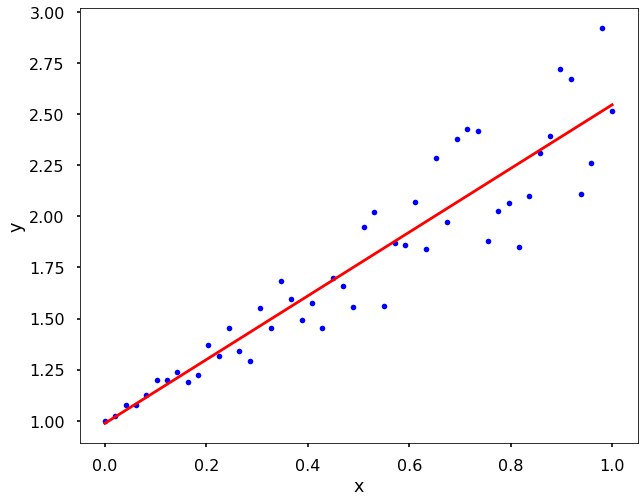

In [12]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# generate random x and y
x = np.linspace(0, 1, 50)
y = 1 + x + x * np.random.random(len(x))

# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()